## Incêndios florestais

#### Sobre os dados

O objetivo do dataframe é, por meio do uso de dados, principalmente meteorológicos, tentar prever a localização de uma área queimada.O dataset foi criado com base nas variáveis do FWI(Fire Weather Index).Os dados contidos vão de janeiro de 2000 até dezembro de 2003.

### Dicionários de dados

| Nome  | Tipo    | Descrição                                       | Unidade de medida |
| ----- | ------- | ----------------------------------------------- | ----------------- |
| X     | int64   | Coordenada espacial X do Parque Montesinho      | 1 - 9             |
| Y     | int64   | Coordenada espacial X do Parque Montesinho      | 2 - 9             |
| month | object  | Mês do ano (Janeiro á Dezembro)                 | jan - dec         |
| day   | object  | Dia da semana (segunda á domingo)               | mon - sun         |
| FFMC  | float64 | Código de Umidade de Combustíveis Finos         | 18.7 - 96.20      |
| DMC   | float64 | Código de Umidade da Camada de Matéria Orgânica | 1.1 - 291.3       |
| DC    | float64 | Código de Seca                                  | 7.9 - 860.6       |
| ISI   | float64 | Índice Legal de Propagação                      | 0.0 - 56.10       |
| temp  | float64 | Temperatura em graus célsius                    | 2.2 - 33.30       |
| RH    | int64   | Humidade Relativa em %                          | 15.0 - 100        |
| wind  | float64 | Velocidade do vento em km/h                     | 0.40 - 9.40       |
| rain  | float64 | chuva em mm/m2                                  | 0.0 - 6.4         |
| area  | float64 | Área queimada da floresta em ha                 | 0.00 - 1090.84    |

#### Explicação das variáveis

X: Coordenada espacial restrita ao Parque Montesinho

Y: Coordenada espacial restrita ao Parque Montesinho

month: mês do ano contado a partir de janeiro até dezembro

day: dia da semana contando a partir de segunda feira até domingo

FFMC: Código de umidade de combustíveis. Indica a umidade dos detritos florestais sob a sombra do dossel florestal. Valor indica  ignição e propagação do fogo.

DMC: Códifo de umidade da camada de matéria orgânica. Representa a umidade da matéria orgânica decomposta abaixo dos detritos florestais. Influencia a intensidade do fogo do fogo.

DC: Representa o ressecamento profundo do solo. Influencia a intensidade do fogo do fogo.

ISI: Propagação inicial. Integra dois fatores em seu valor: a umidade do combutível e a velocidade do vento.

temp: mede a temperatura em graus célsius

RH: Umidade relativa. Indica a umidade percentural do ar. Quanto maior o valor , mais úmido está o ar

wind: Mede a velocidade do vento em quilômetros por hora. A velocidade do vento pode influenciar a propagação dos incêndios.

rain: Quantidade de chuva que cai por milímetro quadrado.

area: Extensão da área queimada da floresta em hectares. Valores iguais a 0 representam áreas queimadas menores que 1ha/100 (ou 100m²)

In [63]:
import pandas as pd
df = pd.read_csv('forestfires.csv')
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### Informação sobre o dataframe:

O dataframe possui 517 registros, não contendo nenhum valor nulo.

In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Resumo dos dados

Na maioria dos registros os valores de média e mediana estão muito próximos. As exessões se encontramemcontram nas variáveis 'area' e 'DC', onde se encontra uma grande discreância entre os valores.

Desvio padrão enorme:
FFMC - DMC - DC - RH - AREA

Text(0, 0.5, 'FFMC')

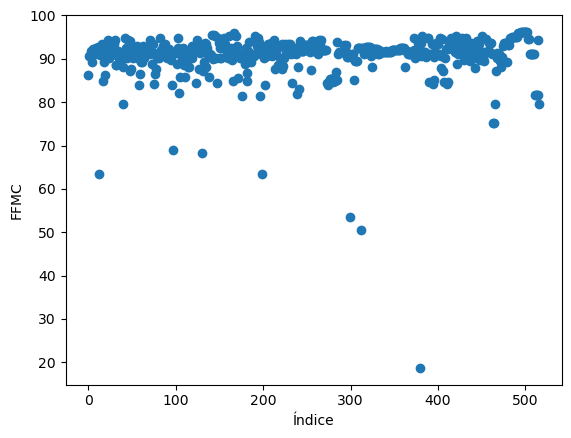

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

new_df = df.copy()
plt.scatter(new_df.index, new_df['FFMC'])
plt.xlabel('Índice')
plt.ylabel('FFMC')

#### FFMC
olhando o gráfico da pra ver que os valores que estão entre 80 e 100 mostra de acordo com o indice (FFMC )que já e um numero que esta moderado entre um pouco a mais elevado no caso ja e uma pequena preocupação para incêndios.

Text(0, 0.5, 'DMC')

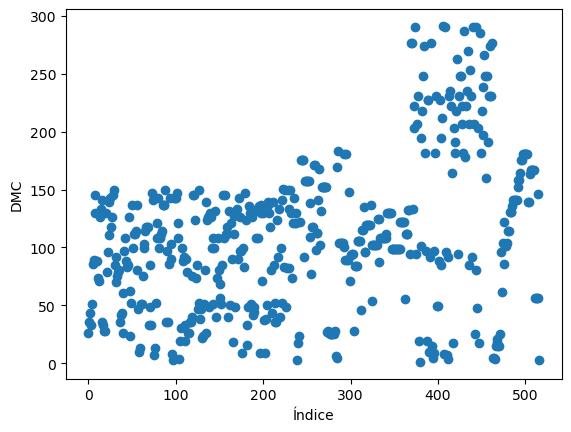

In [14]:
plt.scatter(new_df.index, new_df['DMC'])
plt.xlabel('Índice')
plt.ylabel('DMC')

#### DMC
os dados estão meios dispersos mais olhando o gráfico que a maioria esta abaixo do 200 por que se formos ver so tem alguns estão um pouco elevados mais não todos de acordo com o DMC

Text(0, 0.5, 'DC')

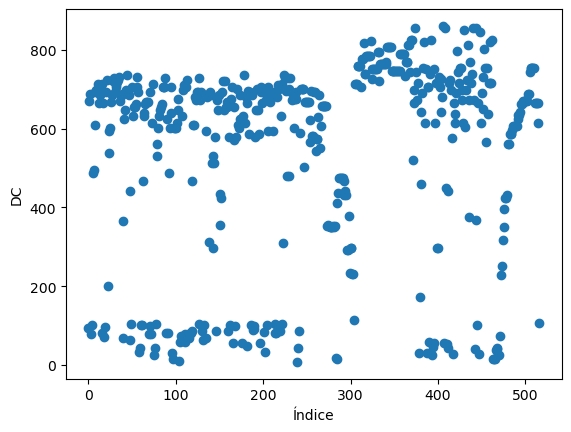

In [15]:
plt.scatter(new_df.index, new_df['DC'])
plt.xlabel('Índice')
plt.ylabel('DC')

#### DC
da pra ver que tem uma concentração de dados na parte mais alta de 600 onde  tem um DMC mais alto  onde fica mais difícil parara apagar o fogo da pra encontrar a concentração baixa  de valores entre 0 e 200 no data frame

Text(0, 0.5, 'RH')

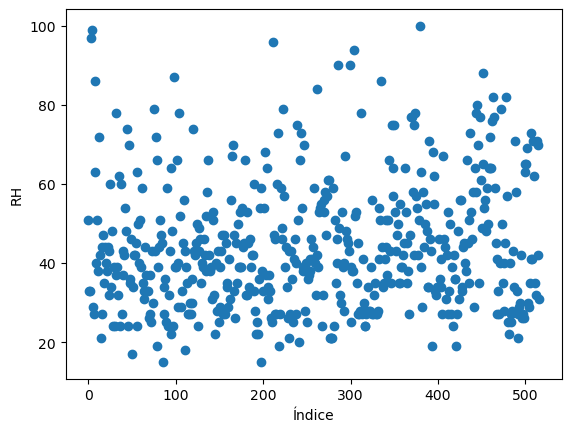

In [16]:
plt.scatter(new_df.index, new_df['RH'])
plt.xlabel('Índice')
plt.ylabel('RH')

#### RH
olhando o gráfico de dispersão tem uma concentração meio distorcida entre 40 e 60 em dispersão

Text(0.5, 1.0, 'Gráfico de historiograma da variável "RH"')

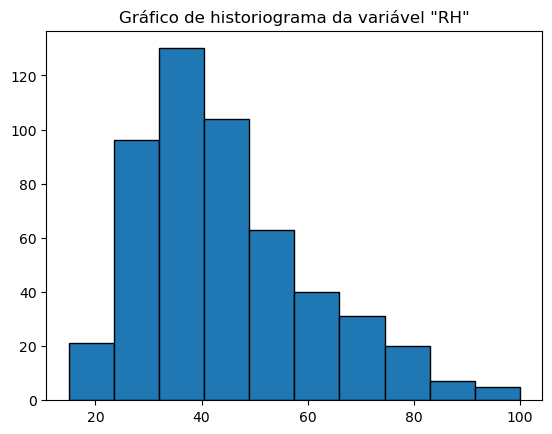

In [33]:
plt.hist(new_df['RH'], bins = 10, edgecolor = 'black')
plt.title('Gráfico de historiograma da variável "RH"')

Text(0, 0.5, 'area')

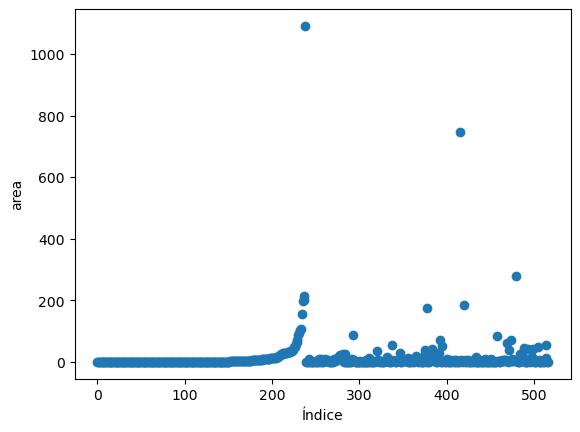

In [17]:
plt.scatter(new_df.index, new_df['area'])
plt.xlabel('Índice')
plt.ylabel('area')

#### Area
Olhando o gráfico de dispersão da variável área é possível notar que a maior parte dos valores se concentra na parte mais baixa do dataframe. O valor 0 representa áreas queimadas menores que 100m^2

### Análises de correlação e bivariadas
#### Analisar relação entre variáveis
Criando questões para tentar responder:

1. O mês do ano tem relação com a taxa de propagação(ISI) ?
2. A quantidade de chuva tem alguma relação com o ressecamento profundo do solo?


#### Visualizar correlação

<Axes: >

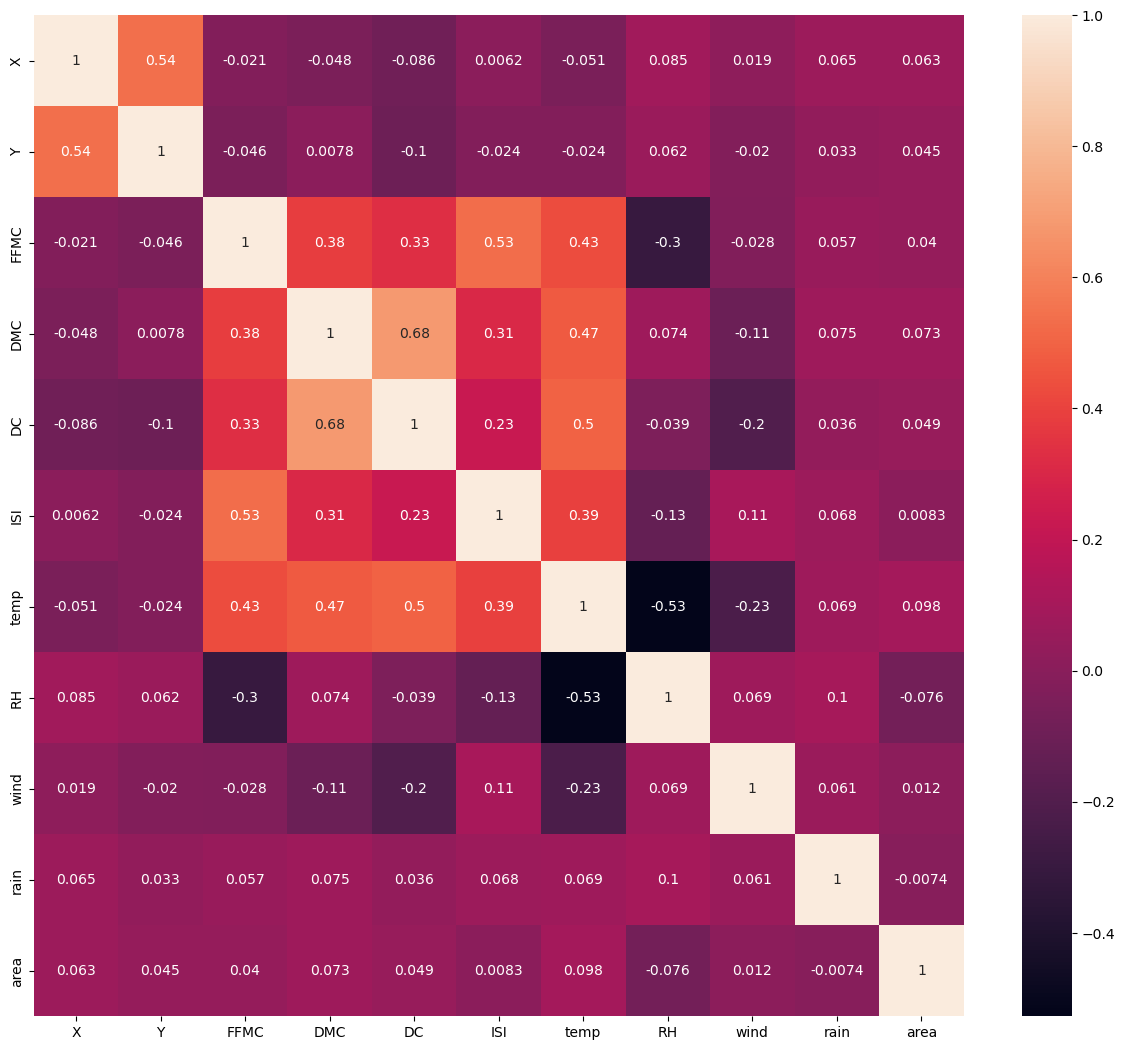

In [69]:
import seaborn as sns
plt.subplots(figsize=(15, 13))
sns.heatmap(df.corr(method='pearson',numeric_only = True), annot=True)

visualizando o gráfico de correlação do pearson não possível encontrar grande correlação entre as variáveis do data frame

<Axes: >

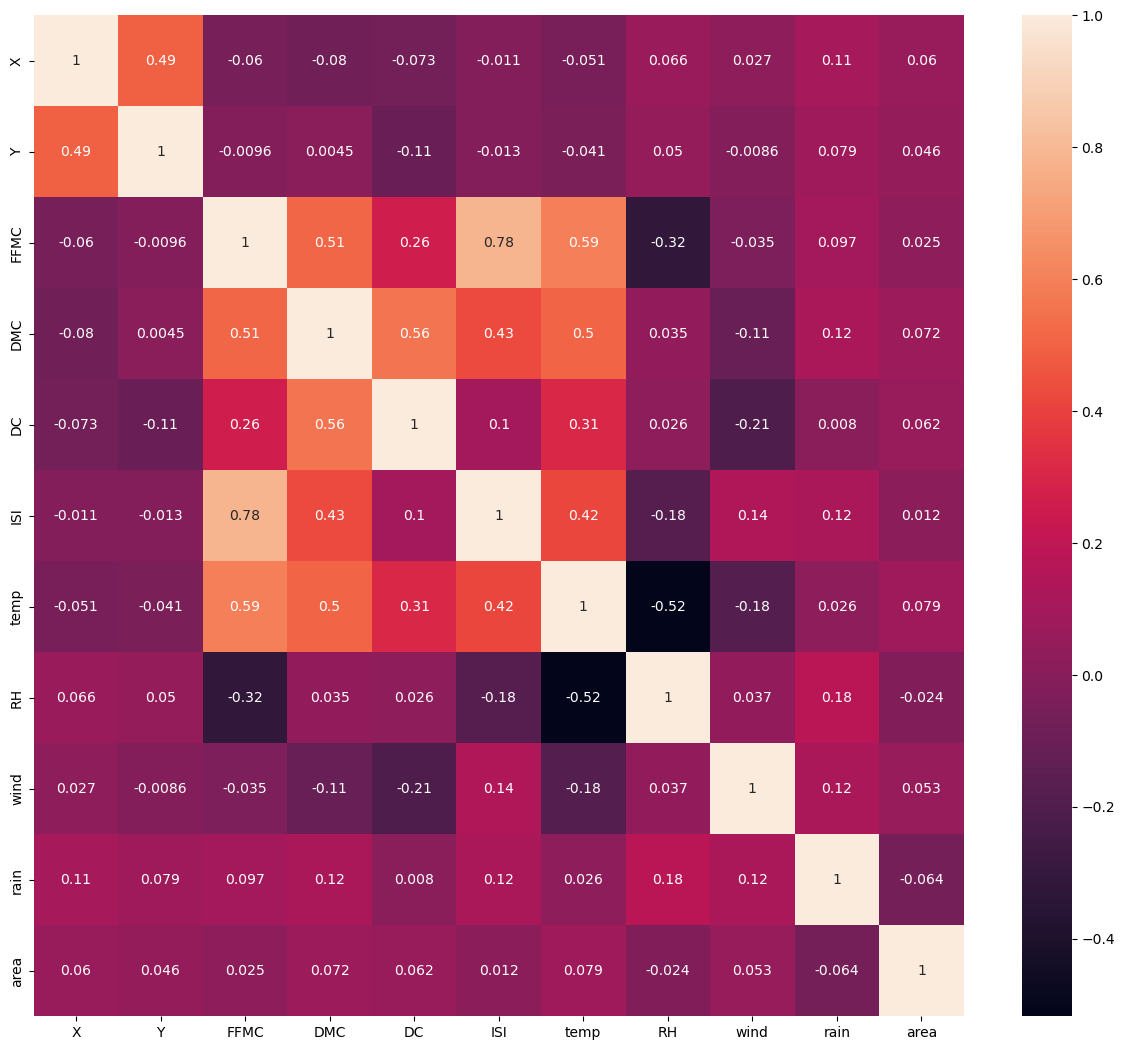

In [70]:
plt.subplots(figsize=(15, 13))
sns.heatmap(df.corr(method='spearman',numeric_only = True), annot=True)

visualizando o gráfico de correlação do spearman não possível encontrar grande correlação na maioria das variáveis do data frame, a única excessão é entre ISI e FFMC

#### Análise de correlação
Observando a correlação entre FFMC e ISI

Text(0.5, 1.0, 'Relação entre ISI e FFMC')

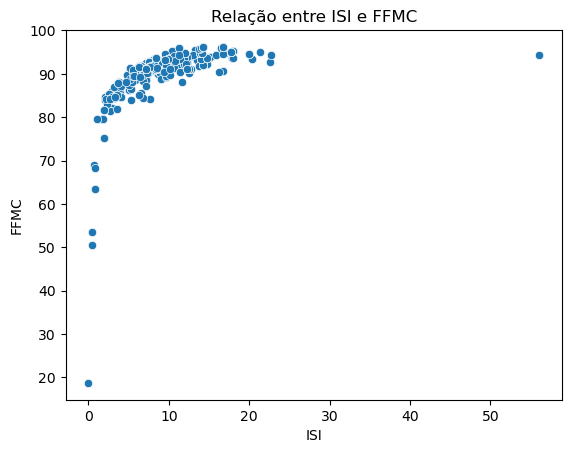

In [71]:
x = df['ISI']
y = df['FFMC']

sns.scatterplot(x=x, y=y)
plt.title('Relação entre ISI e FFMC')

Embora o formato do gráfico não demonstre uma enorme correlação entre as variáveis, ainda é possível enxergar uma pequena correlação entre as variáveis.

#### Análise bivariada

Existe alguma relação entre o mês do ano e o ISI ?

É possível perceber que um outlier está dificultando a visualização do gŕafico. Nós decidimos retirar ele para conseguir ter uma melhor visualização.

<Axes: xlabel='month', ylabel='ISI'>

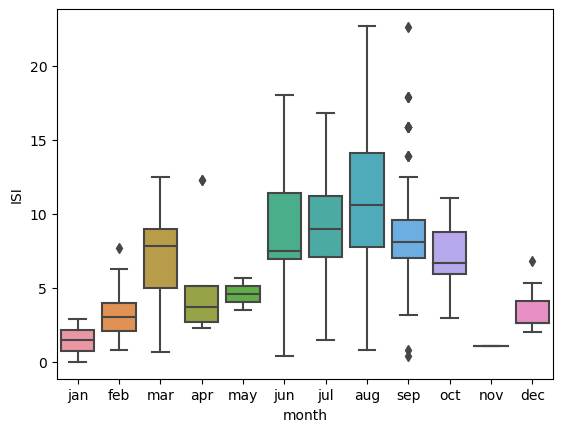

In [74]:
ndf = df.loc[df['ISI'] < 30]
ndf.head()
sns.boxplot(data=ndf, x='month', y='ISI', order=Months)

Olhando esse gráfico é possível ver uma variação do isi durante o período de junho e outubro, o que pode indicar a uma relação. Em Portugal o verão começa a partir de 21 de julho e acaba em 23 de setembro. O que pode indicar que a estação influencia o potencial de propagação de incêndios

/home/dev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='rain', ylabel='DC'>

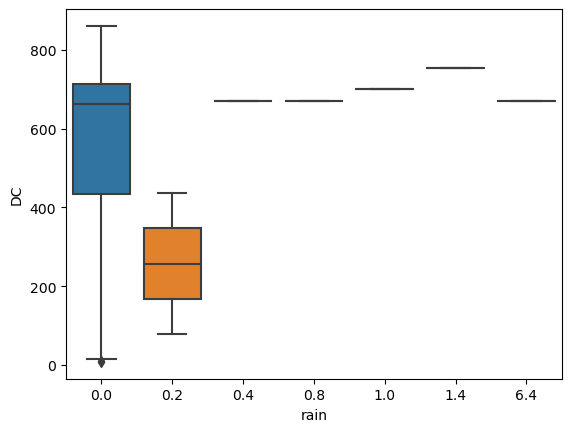

In [18]:
sns.boxplot(data=df, x='rain', y='DC')

Olhando os dados disponíveis é possível ver que o ressecamento profundo do solo é bem mais intenso quando chove menos. Analisando os quartis é possível notar que a mediana do DC é mais baixa quando as chuvas ocorrem.

#### Resultados:


1. O mês do ano tem relação com a taxa de propagação(ISI)?
Resposta: Sim. Quando a estação se aproxima do verão a taxa de propagação de incêndios florestais tende a aumentar.
 
2.   A quantidade de chuva tem alguma relação com o ressecamento profundo do solo?
Resposta: Analisando os dados disponíveis é posível notar uma relação entre o ressecamento profundo do solo e a quantidade de chuva.

#### Referências:
https://archive.ics.uci.edu/dataset/162/forest+fires

https://florestas.pt/conhecer/legislacao-sobre-o-uso-do-fogo-em-portugal/